In [1]:
!pip install pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import libraries
%matplotlib inline
import pulp

from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
import time
import copy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 16.6 MB/s eta 0:00:00


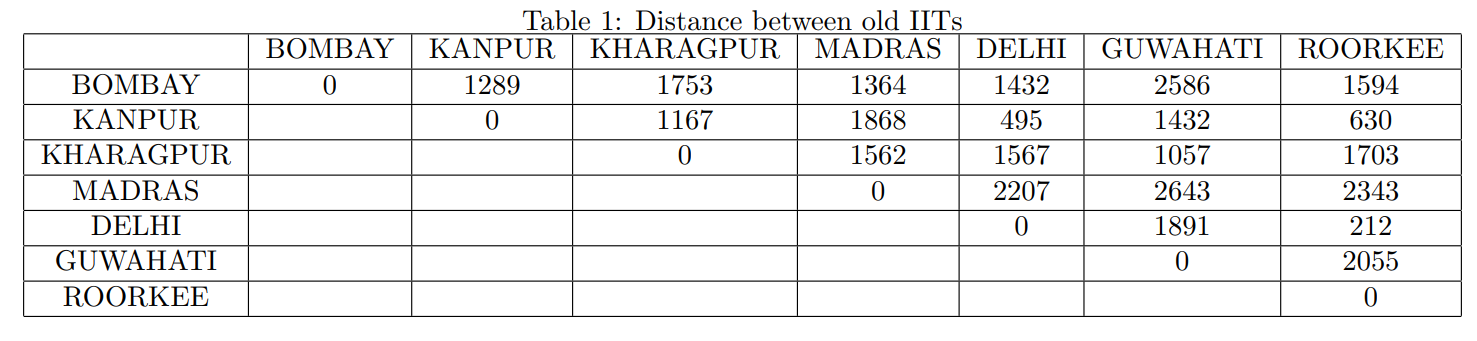

In [2]:
# Distance matrix
distances = {
    "BOMBAY": {"BOMBAY": 0, "KANPUR": 1289, "KHARAGPUR": 1753, "MADRAS": 1364, "DELHI": 1432, "GUWAHATI": 2586, "ROORKEE": 1594},
    "KANPUR": {"BOMBAY": 1289, "KANPUR": 0, "KHARAGPUR": 1167, "MADRAS": 1868, "DELHI": 495, "GUWAHATI": 1432, "ROORKEE": 630},
    "KHARAGPUR": {"BOMBAY": 1753, "KANPUR": 1167, "KHARAGPUR": 0, "MADRAS": 1562, "DELHI": 1567, "GUWAHATI": 1057, "ROORKEE": 1703},
    "MADRAS": {"BOMBAY": 1364, "KANPUR": 1868, "KHARAGPUR": 1562, "MADRAS": 0, "DELHI": 2207, "GUWAHATI": 2643, "ROORKEE": 2343},
    "DELHI": {"BOMBAY": 1432, "KANPUR": 495, "KHARAGPUR": 1567, "MADRAS": 2207, "DELHI": 0, "GUWAHATI": 1891, "ROORKEE":212 },
    "GUWAHATI": {"BOMBAY": 2586, "KANPUR": 1432, "KHARAGPUR": 1057, "MADRAS": 2643, "DELHI": 1891, "GUWAHATI": 0, "ROORKEE": 2055},
    "ROORKEE": {"BOMBAY": 1594, "KANPUR": 630, "KHARAGPUR": 1703, "MADRAS": 2343, "DELHI": 212, "GUWAHATI": 2055, "ROORKEE": 0}
}

# Create a DataFrame
df = pd.DataFrame(distances)

# Display the DataFrame


In [3]:
df

,BOMBAY,KANPUR,KHARAGPUR,MADRAS,DELHI,GUWAHATI,ROORKEE
BOMBAY,0,1289,1753,1364,1432,2586,1594
KANPUR,1289,0,1167,1868,495,1432,630
KHARAGPUR,1753,1167,0,1562,1567,1057,1703
MADRAS,1364,1868,1562,0,2207,2643,2343
DELHI,1432,495,1567,2207,0,1891,212
GUWAHATI,2586,1432,1057,2643,1891,0,2055
ROORKEE,1594,630,1703,2343,212,2055,0


In [4]:
df

,BOMBAY,KANPUR,KHARAGPUR,MADRAS,DELHI,GUWAHATI,ROORKEE
BOMBAY,0,1289,1753,1364,1432,2586,1594
KANPUR,1289,0,1167,1868,495,1432,630
KHARAGPUR,1753,1167,0,1562,1567,1057,1703
MADRAS,1364,1868,1562,0,2207,2643,2343
DELHI,1432,495,1567,2207,0,1891,212
GUWAHATI,2586,1432,1057,2643,1891,0,2055
ROORKEE,1594,630,1703,2343,212,2055,0


In [5]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [6]:
from pyomo.environ import *

In [7]:
cities = ["BOMBAY", "KANPUR", "KHARAGPUR", "MADRAS", "DELHI", "GUWAHATI", "ROORKEE"]

\
**1. Explain why the DFJ formulation will give exactly feasible tours**

The DFJ (Dantzig, Fulkerson, Johnson) formulation for the traveling salesman problem (TSP) ensures that the solution consists of exactly one feasible tour that visits each city exactly once. This is guaranteed by the specific constraints and objective function used in the DFJ formulation:

1. **Every city is visited once and left once**:
   - The constraint that the sum of the edges incident on each city i must be equal to 2 ensures that each city is entered exactly once and left exactly once. This prevents the formation of incomplete tours or visiting a city multiple times.

2. **Elimination of sub-tours**:
   - The constraint that the sum of the edges connecting cities in every subset S to cities outside S must be greater than or equal to 2 ensures that no sub-tours are formed.
   - By requiring that every subset of cities either has no outgoing edges (if it contains all cities) or has at least two outgoing edges, the formulation ensures that the tour is complete and does not revisit any subset of cities.

3. **Binary variable constraints**:
   - The binary variable constraint on the decision variable xe ensures that each edge is either included in the tour (xe = 1) or not included (xe = 0), thereby forming a single, coherent tour without skipping any cities.

Because of these constraints, the DFJ formulation guarantees that the solution will consist of exactly one feasible tour that visits each city exactly once and returns to the starting city, satisfying the requirements of the TSP.

**2. What is the shortest way to visit all seven old IITs starting from IIT Bombay such that you visit each IIT
exactly once? Code and solve an integer program using a solver. Use DFJ formulation. Data of distance
as given in Table 1. Notice there are exponentially many constraints. Since there are exponentially many
constraints, solve by relaxing sub-tour elimination constraints, if the optimal solution gives a sub-tour then
add a constraint to remove it and repeat until you don’t have any sub-tour.**

In [8]:
model = ConcreteModel()
xlist=[(i,j) for i in range(7) for j in range(7) if i!=j]

model.x = Var(xlist,domain = Binary)

model.obj = Objective(expr = sum(model.x[i,j]*df.iloc[i,j] for i in range(7) for j in range(7) if i!=j), sense = minimize)
model.constraints = ConstraintList()

for j in range(len(cities)):
    model.constraints.add(expr=sum(model.x[i, j] for i in range(7) if i != j) == 1)

for i in range(len(cities)):
    model.constraints.add(expr=sum(model.x[i, j] for j in range(7) if i != j) == 1)
 # Adding constraint for subplots

model.constraints.add(expr=model.x[0,3]+model.x[3,0] <= 1)

model.constraints.add(expr=model.x[1,6]+model.x[6,4]+model.x[4,1] <= 2)

model.constraints.add(expr=model.x[2,5]+model.x[5,2] <= 1)

model.constraints.add(expr=model.x[0,3]+model.x[3,2] +model.x[2,5]+model.x[5,1]+model.x[1,0] <= 4)

model.constraints.add(expr=model.x[4,6]+model.x[6,4] <= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [9]:

model.obj()

7689.0

In [10]:
print('Decision Variables for our model : ')
for i in range(7):
   for j in range(7):
    if i!=j:
       print(cities[i],'to',cities[j] ,': ', model.x[i,j].value)

Decision Variables for our model : 
BOMBAY to KANPUR :  0.0
BOMBAY to KHARAGPUR :  0.0
BOMBAY to MADRAS :  1.0
BOMBAY to DELHI :  0.0
BOMBAY to GUWAHATI :  0.0
BOMBAY to ROORKEE :  0.0
KANPUR to BOMBAY :  0.0
KANPUR to KHARAGPUR :  0.0
KANPUR to MADRAS :  0.0
KANPUR to DELHI :  0.0
KANPUR to GUWAHATI :  0.0
KANPUR to ROORKEE :  1.0
KHARAGPUR to BOMBAY :  0.0
KHARAGPUR to KANPUR :  0.0
KHARAGPUR to MADRAS :  0.0
KHARAGPUR to DELHI :  0.0
KHARAGPUR to GUWAHATI :  1.0
KHARAGPUR to ROORKEE :  0.0
MADRAS to BOMBAY :  0.0
MADRAS to KANPUR :  0.0
MADRAS to KHARAGPUR :  1.0
MADRAS to DELHI :  0.0
MADRAS to GUWAHATI :  0.0
MADRAS to ROORKEE :  0.0
DELHI to BOMBAY :  1.0
DELHI to KANPUR :  0.0
DELHI to KHARAGPUR :  0.0
DELHI to MADRAS :  0.0
DELHI to GUWAHATI :  0.0
DELHI to ROORKEE :  0.0
GUWAHATI to BOMBAY :  0.0
GUWAHATI to KANPUR :  1.0
GUWAHATI to KHARAGPUR :  0.0
GUWAHATI to MADRAS :  0.0
GUWAHATI to DELHI :  0.0
GUWAHATI to ROORKEE :  0.0
ROORKEE to BOMBAY :  0.0
ROORKEE to KANPUR :  0.0


3. The TSP polytope is defined as the convex hull of all feasible x ∈ $(0, 1)^{|E|}$
. How many extreme points the TSP
polytope of the IIT problem will have?


The Traveling Salesman Problem (TSP) polytope is defined as the convex hull of all feasible solutions $x ∈ (0, 1)^{|E|}$, where |E| is the number of edges in the complete graph representing the TSP. Each feasible solution x represents a possible tour that visits each city exactly once and returns to the starting city.

An extreme point of a polytope is a point that cannot be expressed as a convex combination of any other points in the polytope, except itself and the vertices of the polytope. In the context of the TSP polytope, an extreme point represents a unique feasible tour that cannot be decomposed into smaller feasible tours.

The number of extreme points in the TSP polytope of the IIT problem can be determined by considering the number of possible feasible tours. In a complete graph with n vertices (cities), there are (n-1)! possible Hamiltonian cycles (feasible tours) that visit each vertex exactly once. However, each Hamiltonian cycle can be traversed in two directions (clockwise or counterclockwise), so the total number of unique feasible tours is (n-1)! / 2.

For the IIT problem with 7 cities (BOMBAY, KANPUR, KHARAGPUR, MADRAS, DELHI, GUWAHATI, ROORKEE), the total number of unique feasible tours is (7-1)! / 2 = 720 / 2 = 360.

Therefore, the TSP polytope of the IIT problem will have 360 extreme points, each corresponding to a unique feasible tour of the 7 cities.